# Exploring Dandiset 001361: A Flexible Hippocampal Population Code for Experience Relative to Reward

**Note**: This notebook was AI-generated and has not been fully verified. Users should exercise caution when interpreting the code or results.

## Overview
This notebook will help explore Dandiset 001361, which contains two-photon imaging and behavioral data from the hippocampal area CA1. The dataset was used in the study "A flexible hippocampal population code for experience relative to reward."

Included is a link for further exploration: [Dandiset 001361](https://dandiarchive.org/dandiset/001361).

The notebook covers:
- Loading the Dandiset and its assets using the DANDI API.
- Examining metadata from a selected NWB file.
- Visualizing time-series and imaging data from the NWB file.
- Summarizing key findings and future analysis directions.

## Required Packages
These packages are assumed to be installed:
- dandi
- h5py
- remfile
- pynwb
- matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from dandi.dandiapi import DandiAPIClient
import pynwb
import remfile

# Set matplotlib style
plt.style.use('ggplot')

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361")
metadata = dandiset.get_raw_metadata()

# Print Dandiset information
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dataset\n")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045
Found 152 assets in the dataset



## Loading an NWB File
We have selected the file `sub-m11/sub-m11_ses-03_behavior+ophys.nwb` for further exploration.

Its download URL is: [NWB File Download Link](https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/).

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: processed suite2p data
Experimenter: ('Mari Sosa',)


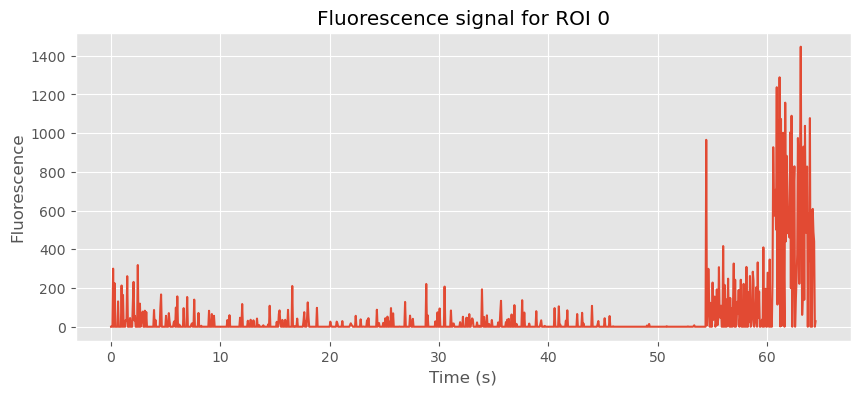

In [2]:
# Load the NWB file from the provided URL
url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic NWB file information
print(f"Session Description: {nwb.session_description}")
print(f"Experimenter: {nwb.experimenter}")

# Get imaging data
plane0_ophys = nwb.processing["ophys"].data_interfaces["Deconvolved"].roi_response_series["plane0"].data
timestamps = np.arange(plane0_ophys.shape[0]) / nwb.acquisition["TwoPhotonSeries"].rate

# Visualize the first ROI
roi_idx = 0
plt.figure(figsize=(10, 4))
plt.plot(timestamps[:1000], plane0_ophys[:1000, roi_idx])
plt.title("Fluorescence signal for ROI 0")
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence")
plt.show()

## Summary and Future Directions
This notebook demonstrated how to explore and visualize data from an NWB file in the DANDI archive. This serves as a baseline for further in-depth analysis. Future steps include:
- Exploring the full dataset for patterns related to behavior.
- Developing advanced visualizations to enhance understanding of the time-series data.

The exploration presented here provides foundational steps, and we highly encourage further interactive analysis to fully leverage the potential of this Dandiset.